Visualize relationship between various features.

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("../data/combined_data_20200421.csv")

In [3]:
list(df.columns)

['Trail Name',
 'Bottom Elev (ft)',
 'Top Elev (ft)',
 'Vertical Drop (ft)',
 'Slope Length (ft)',
 'Difficulty',
 'Resort',
 'Average Steepness',
 'Groomed',
 'Base',
 'Lifts',
 'Top',
 'Vertical Rise (ft)',
 'Black',
 'Blue',
 'Double Black',
 'Green',
 'Terrain Park',
 'Price',
 'Total Runs']

In [4]:
df.head()

,Trail Name,Bottom Elev (ft),Top Elev (ft),Vertical Drop (ft),Slope Length (ft),Difficulty,Resort,Average Steepness,Groomed,Base,Lifts,Top,Vertical Rise (ft),Black,Blue,Double Black,Green,Terrain Park,Price,Total Runs
0,Meadow,6916.0,7070.0,154.0,1056.0,Green,Alpine Meadows,0.145833,Ungroomed,6859,13,8482,1623,0.52,0.43,0.0,0.02,0.03,169,102
1,Subway,6857.0,6965.0,108.0,1056.0,Green,Alpine Meadows,0.102273,Ungroomed,6859,13,8482,1623,0.52,0.43,0.0,0.02,0.03,169,102
2,Alpine Bowl,7762.0,8497.0,735.0,2428.8,Blue,Alpine Meadows,0.302619,Groomed,6859,13,8482,1623,0.52,0.43,0.0,0.02,0.03,169,102
3,Banana Chute,7175.0,7451.0,279.0,739.2,Blue,Alpine Meadows,0.377435,Ungroomed,6859,13,8482,1623,0.52,0.43,0.0,0.02,0.03,169,102
4,Bobby's Run,7582.0,7927.0,341.0,1108.8,Blue,Alpine Meadows,0.307540,Ungroomed,6859,13,8482,1623,0.52,0.43,0.0,0.02,0.03,169,102


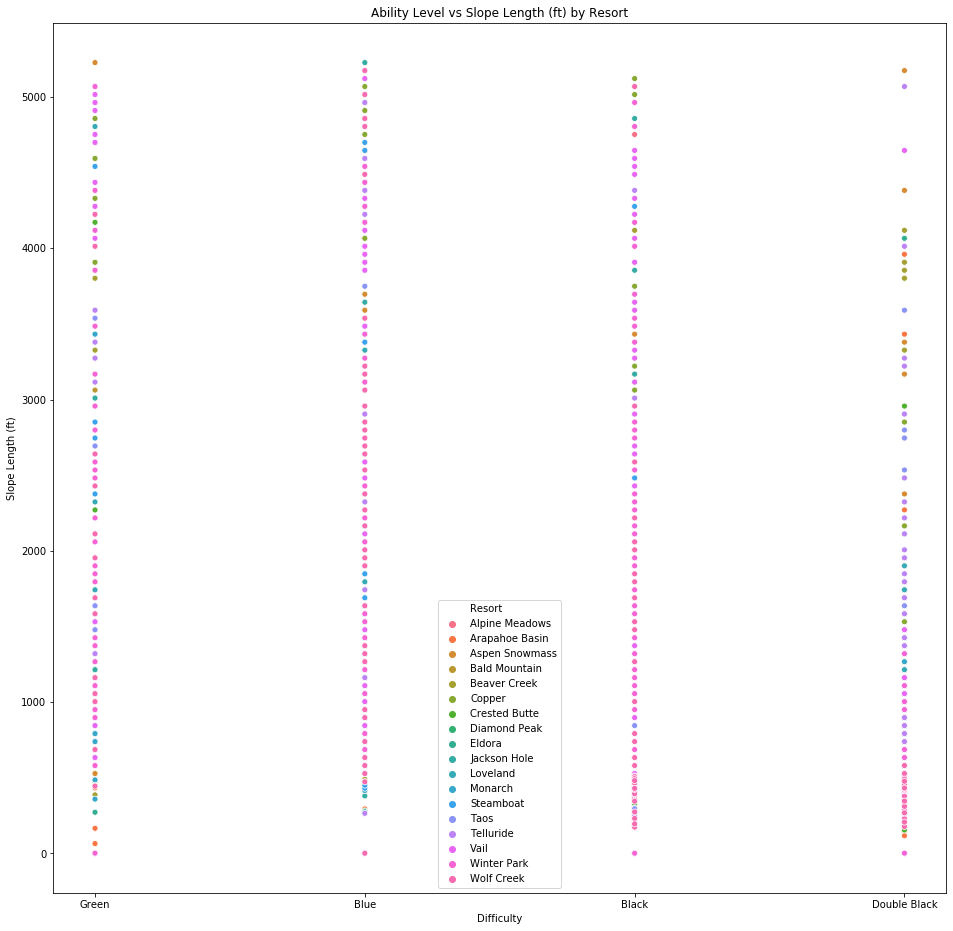

In [5]:
# Ability level vs. Slope Length by Resort
plt.figure(figsize=(16, 16))
plt.title("Ability Level vs Slope Length (ft) by Resort")
sns.scatterplot(x="Difficulty", y="Slope Length (ft)", hue="Resort", data=df)

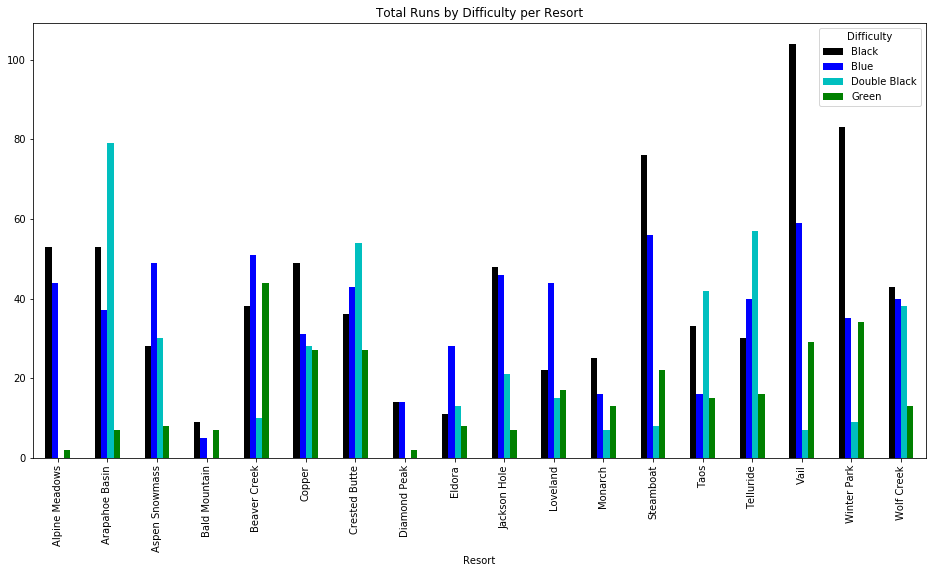

In [6]:
df.groupby(["Resort", "Difficulty"]).size().unstack().plot(kind="bar",
    figsize=(16,8),
    color = ['k','b','c','g'],
    title = 'Total Runs by Difficulty per Resort')

In [7]:
df_resorts = df.drop_duplicates("Resort", keep="first").reset_index(drop=True)
df_resorts = df_resorts[["Resort", "Green", "Blue", "Black", "Double Black", "Terrain Park"]]
# Convert percents to whold numbers
df_resorts[["Green", "Blue", "Black", "Double Black", "Terrain Park"]] = df_resorts[["Green", "Blue", "Black", "Double Black", "Terrain Park"]] * 100

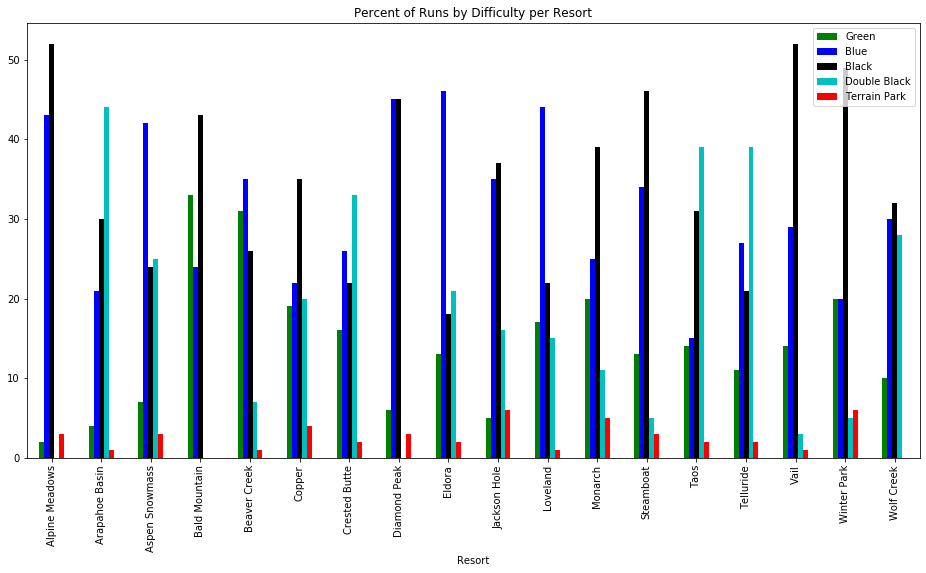

In [8]:
df_resorts.plot(kind="bar",
    figsize=(16,8),
    x = "Resort",
    color = ['g','b','k','c', 'r'],
    title = 'Percent of Runs by Difficulty per Resort')

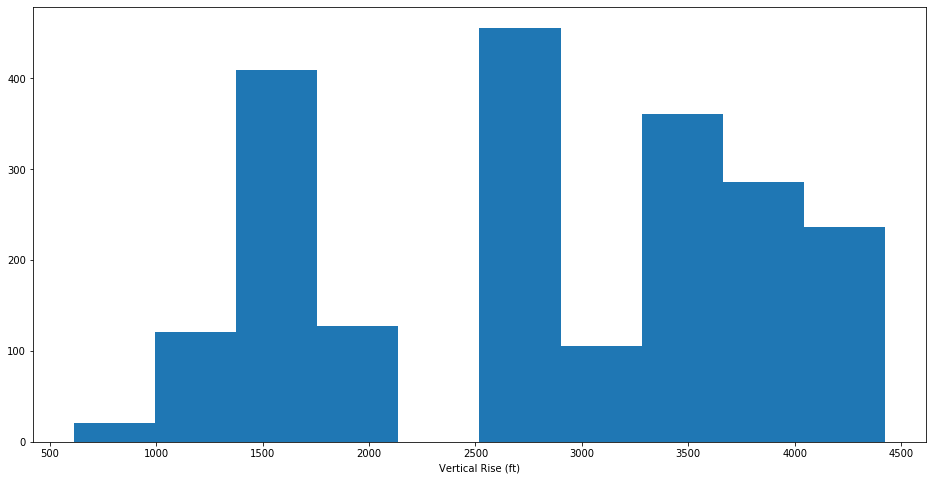

In [9]:
plt.figure(figsize=(16,8))
plt.hist(df['Vertical Rise (ft)'], bins=10)
plt.xlabel('Vertical Rise (ft)');